## Gil Molina, Ana, Zhong, Wenya

# Opciones para localizar el nodo más próximo al programar la condición inicial en el interior del intervalo 

Dado que queremos dar la solución sobre una partición predefinida, y la condición inicial (ci) puede no  coincidir con un nodo, debemos identificar **k** la posición del nodo mas próxima  a nuestra ci. Aquí damos algunas opciones, pero podeis optar por cualquier otra. 

In [1]:

import numpy as np
a=0
b=1
N=10
h=(b-a)/N
x0=.67
nodos=np.zeros(N+1)
for i in range(0,N+1): 
    nodos[i]=a+i*h
print('partición:', nodos, 'c.i.:', x0)

## Opción 1
k=np.argmin(abs(nodos-x0))
xk=nodos[k]
print( 'nodo más próximo:',xk,'posición',k)

partición: [0.  0.1 0.2 0.3 0.4 0.5 0.6 0.7 0.8 0.9 1. ] c.i.: 0.67
nodo más próximo: 0.7000000000000001 posición 7


In [14]:
# Opcion 2
k=np.searchsorted(nodos,x0)
if abs(x0-nodos[k]) <h/2:
     xk=nodos[k]
     print( 'nodo más próximo:',xk,'posición',k)   
else: 
     xk=nodos[k-1]
     print( 'nodo más próximo:',xk,'posición',k-1)

nodo más próximo: 0.7000000000000001 posición 7


In [ ]:
# Opción 3

con for...

# Ejercicios métodos de Euler


En todos los ejercicios se han de comentar los resultados, hacer observaciones de utilidad y si en algún caso los resultados no se corresponden con lo que cabría esperar justificar los mismos. 


**1**. Utilizando los métodos de Euler, Euler Modificado y Euler del punto medio  aproximar las soluciones en [-1,1] del siguiente PVI


$$ 
\left\lbrace
\begin{array}{rcl}
     y' &=& 1-\frac{y}{3} \\
    y(0) &=& 0
\end{array}
\right.
$$

usando tamaños de paso $h_1= 0.1$, $h_2= 0.01$, y $h_3= 0.001$. Comparar las soluciones representando graficamente para cada método las tres soluciones obtenidas con los distintos tamaños de paso sobre una misma gráfica (una gráfica por método), y por otra parte para cada tamaño de paso representar en una misma gráfica las soluciones obtenidas con cada método. Por ultimo sabiendo que la solución exacta es $y(x)=3(1-e^{\frac{-x}{3}})$ representar los errores de  las distintas aproximaciones. 



In [28]:
import numpy as np
import matplotlib.pyplot as plt

def EULER(pvi, rango, n):
    '''Función que usa el método de Euler para hallar una aproximación
    a la solución del PVI en rango.
    
    Parámetros a introducir:
     [f, ci] =  donde f es la función que define el PVI={y'=f(x,y), y(x0)=y0} y  ci es
                la condición inicial [x0,y0]
     rango   =  [a,b] el intervalo sobre el que se aproxima la solución
     n       =  número de puntos de la solución'''
    
    # Lectura de datos
    f = pvi[0]; ci = pvi[1]
    a = rango[0]; b = rango[1]
    x0 = ci[0]; y0 = ci[1]
    
    # Tamaño de paso
    h = (b-a)/n
    
    # Nodo más próximo a ci
    nodos=np.zeros(n+1)
    for i in range(0,n+1): 
        nodos[i]=a+i*h
    k=np.argmin(abs(nodos-x0))
    xk=nodos[k]
    
    # Array vacío para almacenar las iteraciones del método
    S1 = np.zeros((n+1-k,2));
    S1[0,:] = [xk,y0]
    
    # Bucle que realiza el método de Euler hacia adelante
    for i in range(1,n+1-k):
        S1[i,:]=[S1[i-1,0]+h,S1[i-1,1]+h*f(S1[i-1,0],S1[i-1,1])]
        
    if k==0:
        S = S1
        
    else:
        # Array vacío para almacenar las iteraciones del método
        S2 = np.zeros((k+1,2));
        S2[0,:] = [xk,y0]
        
        # Bucle que realiza el método de Euler hacia atrás
        for i in range(1,k+1):
            S2[i,:]=[S2[i-1,0]-h,S2[i-1,1]-h*f(S2[i-1,0],S2[i-1,1])]
            
        S = np.concatenate((S2[1:][::-1],S1))
        
    return S


def EULER_MOD(pvi, rango, n):
    '''Función que usa el método de Euler modificado para hallar una aproximación
    a la solución del PVI en rango.
    
    Parámetros a introducir:
     [f, ci] =  donde f es la función que define el PVI={y'=f(x,y), y(x0)=y0} y  ci es
                la condición inicial [x0,y0]
     rango   =  [a,b] el intervalo sobre el que se aproxima la solución
     n       =  número de puntos de la solución'''
    
    # Lectura de datos
    f = pvi[0]; ci = pvi[1]
    a = rango[0]; b = rango[1]
    x0 = ci[0]; y0 = ci[1]

    # Tamaño de paso
    h = (b-a)/n
    
    # Nodo más próximo a ci
    nodos=np.zeros(n+1)
    for i in range(0,n+1): 
        nodos[i]=a+i*h
    k=np.argmin(abs(nodos-x0))
    xk=nodos[k]

    # Array vacío para almacenar las iteraciones del método
    S1 = np.zeros((n+1-k,2));
    S1[0,:] = [xk,y0]
    
    # Bucle que realiza el método de Euler modificado hacia adelante
    for i in range(1,n+1-k):
        yE = S1[i-1,1]+h*f(S1[i-1,0],S1[i-1,1])
        S1[i,:]=[S1[i-1,0]+h,S1[i-1,1]+h*(f(S1[i-1,0],S1[i-1,1])+f(S1[i-1,0]+h,yE))/2]
        
    if k==0:
        S = S1
        
    else:
        # Array vacío para almacenar las iteraciones del método
        S2 = np.zeros((k+1,2));
        S2[0,:] = [xk,y0]
        
        # Bucle que realiza el método de Euler modificado hacia atrás
        for i in range(1,k+1):
            yE = S2[i-1,1]-h*f(S2[i-1,0],S2[i-1,1])
            S2[i,:]=[S2[i-1,0]-h,S2[i-1,1]-h*(f(S2[i-1,0],S2[i-1,1])+f(S2[i-1,0]-h,yE))/2]
            
        S = np.concatenate((S2[1:][::-1],S1))
        
    return S


def EULER_PUNTO_MEDIO(pvi, rango, n):
    '''Función que usa el método de Euler del punto medio para hallar una aproximación
    a la solución del PVI en rango.
    
    Parámetros a introducir:
     [f, ci] =  donde f es la función que define el PVI={y'=f(x,y), y(x0)=y0} y  ci es
                la condición inicial [x0,y0]
     rango   =  [a,b] el intervalo sobre el que se aproxima la solución
     n       =  número de puntos de la solución'''
    
    # Lectura de datos
    f = pvi[0]; ci = pvi[1]
    a = rango[0]; b = rango[1]
    x0 = ci[0]; y0 = ci[1]
    
    # Tamaño de paso
    h = (b-a)/n
    
    # Nodo más próximo a ci
    nodos=np.zeros(n+1)
    for i in range(0,n+1): 
        nodos[i]=a+i*h
    k=np.argmin(abs(nodos-x0))
    xk=nodos[k]
    
    # Array vacío para almacenar las iteraciones del método
    S1 = np.zeros((n+1-k,2));
    S1[0,:] = [xk,y0]
    
    # Bucle que realiza el método de Euler del punto medio hacia adelante
    for i in range(1,n+1-k):
        ym = S1[i-1,1]+h/2*f(S1[i-1,0],S1[i-1,1])
        S1[i,:]=[S1[i-1,0]+h,S1[i-1,1]+h*f(S1[i-1,0]+h/2,ym)]
        
    if k==0:
        S = S1
        
    else:
        # Array vacío para almacenar las iteraciones del método
        S2 = np.zeros((k+1,2));
        S2[0,:] = [xk,y0]
        
        # Bucle que realiza el método de Euler del punto medio hacia atrás
        for i in range(1,k+1):
            ym = S2[i-1,1]-h/2*f(S2[i-1,0],S2[i-1,1])
            S2[i,:]=[S2[i-1,0]-h,S2[i-1,1]-h*f(S2[i-1,0]-h/2,ym)]
        
        S = np.concatenate((S2[1:][::-1],S1))
        
    return S

In [29]:
def f1(x,y):
    return 1-y/3

def f1_sol(x):
    return 3*(1-np.exp(-x/3))

N1 = [20,200,2000]

# Euler
[S10,S11,S12] = [EULER([f1,[0,0]],[-1,1],i) for i in N1]

# Euler modificado
[SM10,SM11,SM12] = [EULER_MOD([f1,[0,0]],[-1,1],i) for i in N1]

# Euler del punto medio
[SPM10,SPM11,SPM12] = [EULER_PUNTO_MEDIO([f1,[0,0]],[-1,1],i) for i in N1]

SolEx10 = f1_sol(S10[:,0]); SolEx11 = f1_sol(S11[:,0]); SolEx12 = f1_sol(S12[:,0])

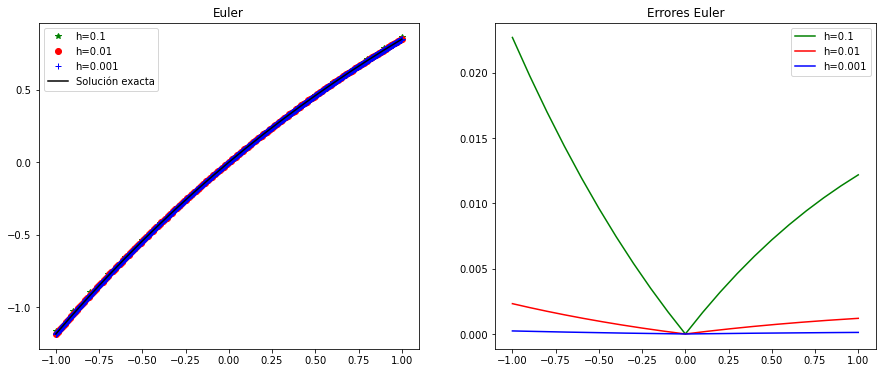

In [49]:
# Gráficas de Euler

E10 = abs(S10[:,1]-SolEx10)
E11 = abs(S11[:,1]-SolEx11)
E12 = abs(S12[:,1]-SolEx12)

plt.figure(figsize=(15,6))

plt.subplot(121)
plt.plot(S10[:,0],S10[:,1],'*g',label='h=0.1')
plt.plot(S11[:,0],S11[:,1],'or',label='h=0.01')
plt.plot(S12[:,0],S12[:,1],'+b',label='h=0.001')
plt.plot(S10[:,0],SolEx10,'k',label='Solución exacta')
plt.title('Euler')
plt.legend(loc='best')

plt.subplot(122)
plt.plot(S10[:,0],E10,'g',label='h=0.1')
plt.plot(S11[:,0],E11,'r',label='h=0.01')
plt.plot(S12[:,0],E12,'b',label='h=0.001')
plt.title('Errores Euler')
plt.legend(loc='best')

Observamos que para los tres tamaños de paso se obtienen buenas aproximaciones a la solución exacta, y que además al disminuir el tamaño de paso disminuye el error.
Además, observamos que conforme nos alejamos de la condición inicial $x_0=0$, tanto hacia adelante como hacia atrás, va aumentando el error, con máximos en $x=-1$ y en $x=1$.

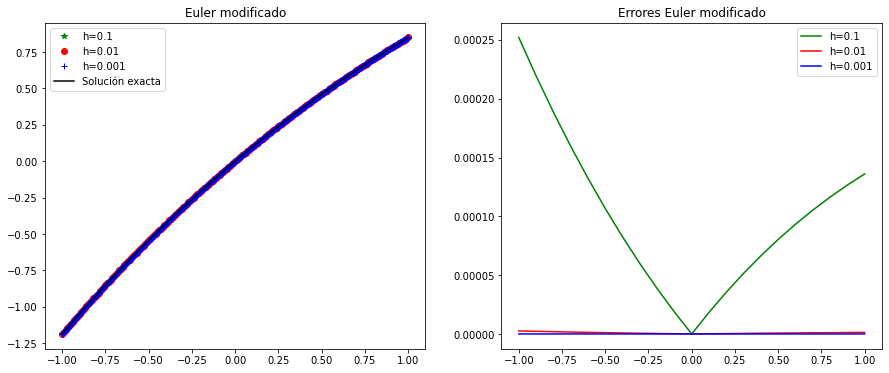

In [31]:
# Gráficas de Euler modificado

EM10 = abs(SM10[:,1]-SolEx10)
EM11 = abs(SM11[:,1]-SolEx11)
EM12 = abs(SM12[:,1]-SolEx12)

plt.figure(figsize=(15,6))

plt.subplot(121)
plt.plot(SM10[:,0],SM10[:,1],'*g',label='h=0.1')
plt.plot(SM11[:,0],SM11[:,1],'or',label='h=0.01')
plt.plot(SM12[:,0],SM12[:,1],'+b',label='h=0.001')
plt.plot(SM10[:,0],SolEx10,'k',label='Solución exacta')
plt.title('Euler modificado')
plt.legend(loc='best')

plt.subplot(122)
plt.plot(SM10[:,0],EM10,'g',label='h=0.1')
plt.plot(SM11[:,0],EM11,'r',label='h=0.01')
plt.plot(SM12[:,0],EM12,'b',label='h=0.001')
plt.title('Errores Euler modificado')
plt.legend(loc='best')

De nuevo, al disminuir el tamaño de paso disminuye el error.
Además, vuelve a ocurrir que al irnos alejándonos de la condición inicial $x_0=0$, tanto hacia adelante como hacia atrás, va aumentando el error, con máximos en $x=-1$ y en $x=1$.

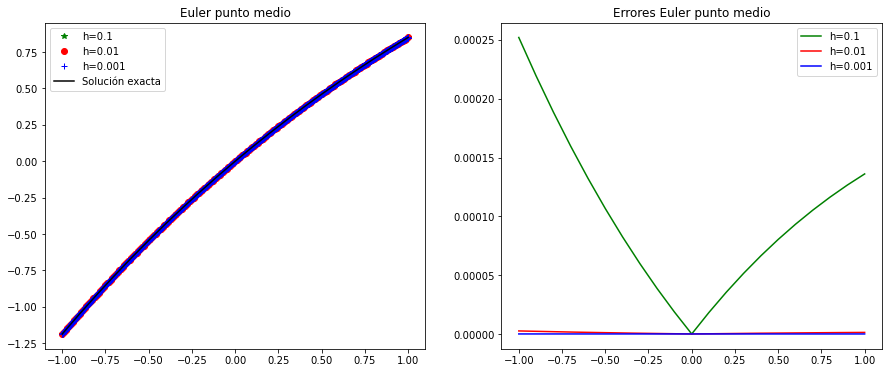

In [32]:
# Gráficas de Euler del punto medio

EPM10 = abs(SPM10[:,1]-SolEx10)
EPM11 = abs(SPM11[:,1]-SolEx11)
EPM12 = abs(SPM12[:,1]-SolEx12)

plt.figure(figsize=(15,6))

plt.subplot(121)
plt.plot(SPM10[:,0],SPM10[:,1],'*g',label='h=0.1')
plt.plot(SPM11[:,0],SPM11[:,1],'or',label='h=0.01')
plt.plot(SPM12[:,0],SPM12[:,1],'+b',label='h=0.001')
plt.plot(SPM10[:,0],SolEx10,'k',label='Solución exacta')
plt.title('Euler punto medio')
plt.legend(loc='best')

plt.subplot(122)
plt.plot(SPM10[:,0],EPM10,'g',label='h=0.1')
plt.plot(SPM11[:,0],EPM11,'r',label='h=0.01')
plt.plot(SPM12[:,0],EPM12,'b',label='h=0.001')
plt.title('Errores Euler punto medio')
plt.legend(loc='best')

De nuevo, al disminuir el tamaño de paso disminuye el error.
También, al alejarnos de la condición inicial $x_0=0$, adelante y atrás, va aumentando el error.

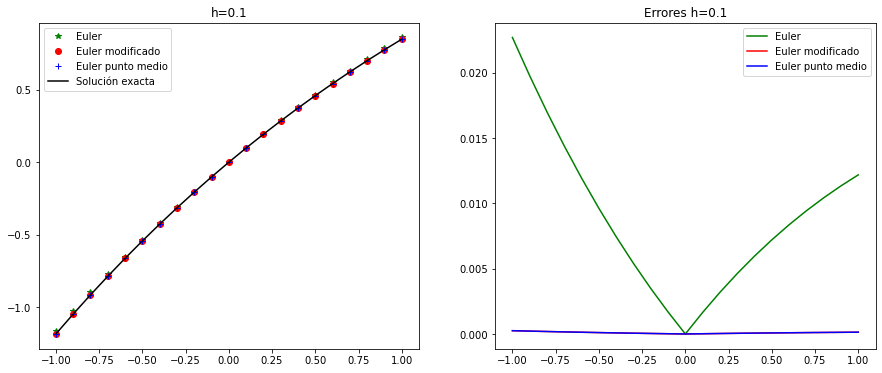

In [33]:
# Gráficas para h=0.1

plt.figure(figsize=(15,6))

plt.subplot(121)
plt.plot(S10[:,0],S10[:,1],'*g',label='Euler')
plt.plot(SM10[:,0],SM10[:,1],'or',label='Euler modificado')
plt.plot(SPM10[:,0],SPM10[:,1],'+b',label='Euler punto medio')
plt.plot(S10[:,0],SolEx10,'k',label='Solución exacta')
plt.title('h=0.1')
plt.legend(loc='best')

plt.subplot(122)
plt.plot(S10[:,0],E10,'g',label='Euler')
plt.plot(SM10[:,0],EM10,'r',label='Euler modificado')
plt.plot(SPM10[:,0],EPM10,'b',label='Euler punto medio')
plt.title('Errores h=0.1')
plt.legend(loc='best')

Observamos que el método de Euler es el que peor aproxima la solución, pues es el que tiene mayores errores, mientras que el método de Euler del punto medio y el de Euler modificado son los que mejor la aproximan, con muy poca diferencia entre ellos.

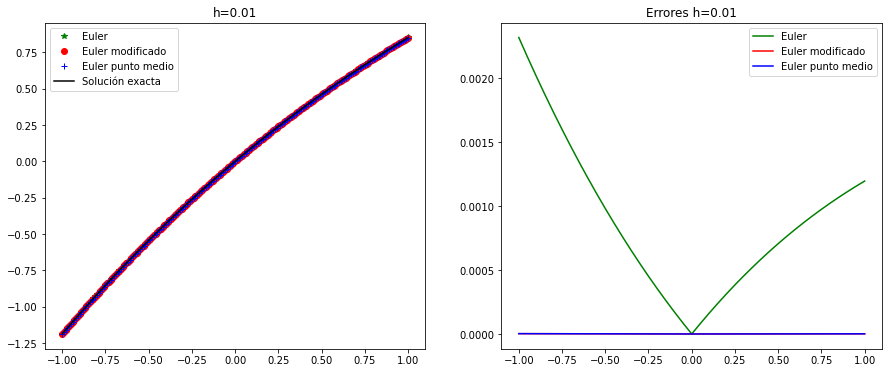

In [50]:
# Gráficas para h=0.01

plt.figure(figsize=(15,6))

plt.subplot(121)
plt.plot(S11[:,0],S11[:,1],'*g',label='Euler')
plt.plot(SM11[:,0],SM11[:,1],'or',label='Euler modificado')
plt.plot(SPM11[:,0],SPM11[:,1],'+b',label='Euler punto medio')
plt.plot(S11[:,0],SolEx11,'k',label='Solución exacta')
plt.title('h=0.01')
plt.legend(loc='best')

plt.subplot(122)
plt.plot(S11[:,0],E11,'g',label='Euler')
plt.plot(SM11[:,0],EM11,'r',label='Euler modificado')
plt.plot(SPM11[:,0],EPM11,'b',label='Euler punto medio')
plt.title('Errores h=0.01')
plt.legend(loc='best')

De nuevo, el método de Euler es el que tiene mayores errores y el de Euler del punto medio y Euler modificado los que los tienen menores, prácticamente de $0$, aunque en este caso, al tomar un tamaño de paso menor, los errores para cada método son menores que en el ejemplo anterior.

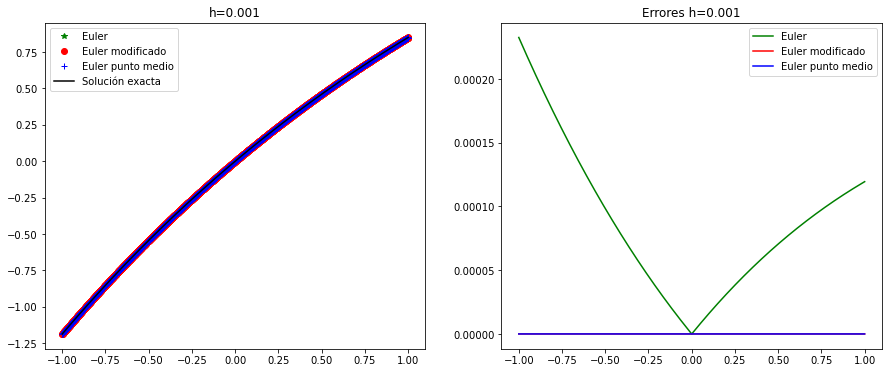

In [8]:
# Gráficas para h=0.001

plt.figure(figsize=(15,6))

plt.subplot(121)
plt.plot(S12[:,0],S12[:,1],'*g',label='Euler')
plt.plot(SM12[:,0],SM12[:,1],'or',label='Euler modificado')
plt.plot(SPM12[:,0],SPM12[:,1],'+b',label='Euler punto medio')
plt.plot(S12[:,0],SolEx12,'k',label='Solución exacta')
plt.title('h=0.001')
plt.legend(loc='best')

plt.subplot(122)
plt.plot(S12[:,0],E12,'g',label='Euler')
plt.plot(SM12[:,0],EM12,'r',label='Euler modificado')
plt.plot(SPM12[:,0],EPM12,'b',label='Euler punto medio')
plt.title('Errores h=0.001')
plt.legend(loc='best')

Ocurre lo mismo, y de nuevo los errores de los métodos son menores que en los dos ejemplos anteriores por tomar un tamaño de paso menor.





**2**. Considérese el PVI
$$
\left\lbrace
\begin{array}{rcl}
     y' &=& sin(x)+x\cdot cos(x)  \\
    y(\pi) &=& 0 
\end{array}
\right.
$$

cuya solución exacta es $y(x)=x\cdot sin(x)$

a) Aproximar la solución del PVI con los distintos métodos sobre el intervalo $[-10,10]$ usando tamaños de paso que varíen de $2^{-1}$ a $2^{-3}$ dividiendo el paso a la mitad.


b) Mostrar de forma tabulada para los nodos enteros los valores absolutos del error cometido  por las aproximaciones obtenidas en el apartado anterior. Comentar los resultados. 

c) Mostrar de forma tabulada para los nodos enteros los porcentajes de error de las aproximaciones obtenidas por los métodos en a). ( ie, $ \text{error relativo} \times 100 $ ,
donde $ \text{error relativo} = \left \vert { \dfrac{ \text{error absoluto} }{ \text{valor exacto} } } \right \vert $ )


In [34]:
def f2(x,y):
    return np.sin(x)+x*np.cos(x)

def f2_sol(x):
    return x*np.sin(x)

# APARTADO A

N2 = [40,80,160]

# Euler
S2 = [EULER([f2,[np.pi,0]],[-10,10],i) for i in N2]

# Euler modificado
SM2 = [EULER_MOD([f2,[np.pi,0]],[-10,10],i) for i in N2]

# Euler del punto medio
SPM2 = [EULER_PUNTO_MEDIO([f2,[np.pi,0]],[-10,10],i) for i in N2]

In [35]:
print('\n Aproximaciones numéricas con los distintos tamaños de paso con Euler: \n') 
print( ' x        h=0.5            h=0.25              h=0.125 \n')
print('-----------------------------------------------------------------')  
for i in range(0,len(S2[0]),2):   
    print ('%.0f   %3.10e   %3.10e   %3.10e  ' %(S2[0][i,0],S2[0][i,1],S2[1][i*2,1],S2[2][i*4,1]))


 Aproximaciones numéricas con los distintos tamaños de paso con Euler: 

 x        h=0.5            h=0.25              h=0.125 

-----------------------------------------------------------------
-10   -2.7936616424e+00   -3.5261960840e+00   -4.7318191979e+00  
-9   5.8745085956e+00   5.4312916980e+00   4.3336866440e+00  
-8   8.1211366376e+00   8.6714787318e+00   8.0601651489e+00  
-7   3.3851030178e+00   4.6185778762e+00   4.3690585365e+00  
-6   -2.6371698707e+00   -1.5653627050e+00   -1.8693364762e+00  
-5   -4.4629349135e+00   -4.0465181222e+00   -4.6712776745e+00  
-4   -1.8141908166e+00   -1.8192601355e+00   -2.6691876445e+00  
-3   1.4144287409e+00   1.5419935159e+00   7.4210442724e-01  
-2   2.0781203114e+00   2.5727113020e+00   1.9554009127e+00  
-1   8.3543327150e-01   1.4475695516e+00   9.0049362692e-01  
0   3.7632486172e-01   7.8800597762e-01   1.4767717682e-01  
1   1.5263199168e+00   1.7930128743e+00   1.0732152883e+00  
2   2.1166221883e+00   2.5919622404e+00   1.9650

In [36]:
print('\n Aproximaciones numéricas con los distintos tamaños de paso con Euler modificado: \n') 
print( ' x        h=0.5            h=0.25              h=0.125 \n')
print('-----------------------------------------------------------------')  
for i in range(0,len(SM2[0]),2):   
    print ('%.0f   %3.10e   %3.10e   %3.10e  ' %(SM2[0][i,0],SM2[0][i,1],SM2[1][i*2,1],SM2[2][i*4,1]))


 Aproximaciones numéricas con los distintos tamaños de paso con Euler modificado: 

 x        h=0.5            h=0.25              h=0.125 

-----------------------------------------------------------------
-10   -5.7345601132e+00   -5.0604277069e+00   -5.4844888441e+00  
-9   3.2202807573e+00   4.0403953913e+00   3.6526846560e+00  
-8   7.3702617613e+00   8.2322589061e+00   7.8550014014e+00  
-7   4.1614642422e+00   4.9429761009e+00   4.5457038142e+00  
-6   -1.9739826857e+00   -1.2975515000e+00   -1.7209847084e+00  
-5   -5.0553026208e+00   -4.4064843634e+00   -4.8368146297e+00  
-4   -3.3642494317e+00   -2.6580718306e+00   -3.0741473266e+00  
-3   0.0000000000e+00   7.7099675794e-01   3.7105221362e-01  
-2   1.3901568794e+00   2.1649471985e+00   1.7659650263e+00  
-1   4.7366222373e-01   1.2029016402e+00   7.9260583657e-01  
0   -3.3088950871e-01   3.7061640489e-01   -4.6571444188e-02  
1   4.7366222373e-01   1.2029016402e+00   7.9260583657e-01  
2   1.3901568794e+00   2.1649471985

In [37]:
print('\n Aproximaciones numéricas con los distintos tamaños de paso con Euler del punto medio: \n') 
print( ' x        h=0.5            h=0.25              h=0.125 \n')
print('-----------------------------------------------------------------')  
for i in range(0,len(SPM2[0]),2):   
    print ('%.0f   %3.10e   %3.10e   %3.10e  ' %(SPM2[0][i,0],SPM2[0][i,1],SPM2[1][i*2,1],SPM2[2][i*4,1]))


 Aproximaciones numéricas con los distintos tamaños de paso con Euler del punto medio: 

 x        h=0.5            h=0.25              h=0.125 

-----------------------------------------------------------------
-10   -5.9282888164e+00   -5.1026631665e+00   -5.4958475167e+00  
-9   3.3185165094e+00   4.0708607355e+00   3.6594831480e+00  
-8   7.5522625351e+00   8.2836307113e+00   7.8670243294e+00  
-7   4.1824944437e+00   4.9543183423e+00   4.5477325704e+00  
-6   -2.1631138302e+00   -1.3385311020e+00   -1.7320228419e+00  
-5   -5.2996596218e+00   -4.4612580813e+00   -4.8513005098e+00  
-4   -3.4938877453e+00   -2.6843360080e+00   -3.0815163713e+00  
-3   -2.2204460493e-16   7.7699448404e-01   3.7173947687e-01  
-2   1.3977440017e+00   2.1728696688e+00   1.7671352002e+00  
-1   3.9014754079e-01   1.1881968477e+00   7.8812838064e-01  
0   -4.6987119739e-01   3.4212752148e-01   -5.4489797220e-02  
1   3.9014754079e-01   1.1881968477e+00   7.8812838064e-01  
2   1.3977440017e+00   2.1728

In [38]:
# APARTADO B

SolEx20 = f2_sol(S2[0][:,0]); SolEx21 = f2_sol(S2[1][:,0]); SolEx22 = f2_sol(S2[2][:,0])

# Errores para el método de Euler

E20 = abs(S2[0][:,1]-SolEx20)
E21 = abs(S2[1][:,1]-SolEx21)
E22 = abs(S2[2][:,1]-SolEx22)

# Errores para el método de Euler modificado

EM20 = abs(SM2[0][:,1]-SolEx20)
EM21 = abs(SM2[1][:,1]-SolEx21)
EM22 = abs(SM2[2][:,1]-SolEx22)

# Errores para el método de Euler del punto medio

EPM20 = abs(SPM2[0][:,1]-SolEx20)
EPM21 = abs(SPM2[1][:,1]-SolEx21)
EPM22 = abs(SPM2[2][:,1]-SolEx22)

In [39]:
print('\n Error de las aproximaciones numéricas con los distintos tamaños de paso con Euler: \n') 
print( ' x        h=0.5        h=0.25        h=0.125          \n')
print('--------------------------------------------------------------')  
for i in range(0,len(S2[0]),2):   
    print ('%.0f      %3f     %3f      %3f' %(S2[0][i,0],E20[i],E21[i*2],E22[i*4]))


 Error de las aproximaciones numéricas con los distintos tamaños de paso con Euler: 

 x        h=0.5        h=0.25        h=0.125          

--------------------------------------------------------------
-10      2.646549     1.914015      0.708392
-9      2.165442     1.722225      0.624620
-8      0.206271     0.756613      0.145299
-7      1.213803     0.019672      0.229848
-6      0.960677     0.111130      0.192843
-5      0.331686     0.748103      0.123344
-4      1.213019     1.207950      0.358022
-3      0.991069     1.118633      0.318744
-2      0.259525     0.754116      0.136806
-1      0.006038     0.606099      0.059023
0      0.376325     0.788006      0.147677
1      0.684849     0.951542      0.231744
2      0.298027     0.773367      0.146432
3      0.423360     0.411419      0.034863
4      0.201410     0.373171      0.030475
5      1.082742     0.086676      0.265154
6      2.375106     0.723649      0.581341
7      2.628232     0.815107      0.618345
8      1.

Se observa que para cada tamaño de paso, el error va aumentando al dar más pasos, tanto hacia adelante como hacia atrás, teniendo en cuenta que $x_0 = \pi$.
Además, al disminuir el tamaño de paso, los errores van disminuyendo. Observamos que los errores que se obtienen para $h=0.5$ son los mayores, llegando a obtener el mayor error para $x=-10$, de $2.646549$, mientras que para $h=0.125$ se obtienen errores mucho menores, siendo el mayor de ellos de $0.708392$, también para $x=-10$, que justamente es el nodo entero más alejado de la condición inicial $x_0 = \pi$.

In [40]:
print('\n Error de las aproximaciones numéricas con los distintos tamaños de paso con Euler modificado: \n') 
print( ' x        h=0.5      h=0.25        h=0.125          \n')
print('--------------------------------------------------------------')  
for i in range(0,len(SM2[0]),2):   
    print ('%.0f     %3f     %3f     %3f' %(SM2[0][i,0],EM20[i],EM21[i*2],EM22[i*4]))


 Error de las aproximaciones numéricas con los distintos tamaños de paso con Euler modificado: 

 x        h=0.5      h=0.25        h=0.125          

--------------------------------------------------------------
-10     0.294349     0.379783     0.044278
-9     0.488786     0.331329     0.056382
-8     0.544604     0.317393     0.059865
-7     0.437442     0.344070     0.053202
-6     0.297490     0.378941     0.044492
-5     0.260681     0.388137     0.042193
-4     0.337039     0.369138     0.046937
-3     0.423360     0.347637     0.052308
-2     0.428438     0.346352     0.052630
-1     0.367809     0.361431     0.048865
0     0.330890     0.370616     0.046571
1     0.367809     0.361431     0.048865
2     0.428438     0.346352     0.052630
3     0.423360     0.347637     0.052308
4     0.337039     0.369138     0.046937
5     0.260681     0.388137     0.042193
6     0.297490     0.378941     0.044492
7     0.437442     0.344070     0.053202
8     0.544604     0.317393     0.05

En este caso observamos que al dar pasos no aumenta demasiado el error, y que cuando menor es el tamaño de paso, menores son los errores obtenidos. Sin embargo, comparándolo con el método de Euler, tenemos que en este caso se obtienen errores menores en general, que se disminuyen para el tamaño de paso menor, $h=0.125$.

In [41]:
print('\n Error de las aproximaciones numéricas con los distintos tamaños de paso con Euler del punto medio: \n') 
print( ' x        h=0.5        h=0.25        h=0.125          \n')
print('--------------------------------------------------------------')  
for i in range(0,len(SPM2[0]),2):   
    print ('%.0f     %3f      %3f      %3f' %(SPM2[0][i,0],EPM20[i],EPM21[i*2],EPM22[i*4]))


 Error de las aproximaciones numéricas con los distintos tamaños de paso con Euler del punto medio: 

 x        h=0.5        h=0.25        h=0.125          

--------------------------------------------------------------
-10     0.488078      0.337548      0.055636
-9     0.390550      0.361794      0.049583
-8     0.362603      0.368765      0.047842
-7     0.416412      0.355412      0.051174
-6     0.486621      0.337962      0.055530
-5     0.505038      0.333363      0.056679
-4     0.466678      0.342874      0.054306
-3     0.423360      0.353634      0.051621
-2     0.420851      0.354275      0.051460
-1     0.451323      0.346726      0.053343
0     0.469871      0.342128      0.054490
1     0.451323      0.346726      0.053343
2     0.420851      0.354275      0.051460
3     0.423360      0.353634      0.051621
4     0.466678      0.342874      0.054306
5     0.505038      0.333363      0.056679
6     0.486621      0.337962      0.055530
7     0.416412      0.355412      0.

Con el método de Euler del punto medio se obtienen errores similares a los obtenidos con Euler modificado, e inferiores a los de Euler.
Vemos que para $h=0.5$ los errores son aproximadamente de $0.45$, para $h=0.25$ son aproximadamente de $0.35$ y para $h=0.125$ son aproximadamente de $0.05$, y no experimentan un gran aumento en cada paso.

In [42]:
# APARTADO C

# Para que no nos de error al dividir por 0, no calcularemos el porcentaje de error
# para x=0, pues la solución exacta en este caso da 0. Tomaremos este porcentaje de error como 0.

# Arrays vacíos para almacenar los porcentajes de error con h=0.5
PE20 = np.zeros((len(E20)))        # Euler
PEM20 = np.zeros((len(E20)))       # Euler modificado
PEPM20 = np.zeros((len(E20)))      # Euler del punto medio

# Bucle que calcula los porcentajes de error para h=0.5
for i in range(0,len(E20)):
    if SolEx20[i] == 0:
        PE20[i] = 0
        PEM20[i] = 0
        PEPM20[i] = 0
    else:
        PE20[i] = 100*abs(E20[i]/SolEx20[i])
        PEM20[i] = 100*abs(EM20[i]/SolEx20[i])
        PEPM20[i] = 100*abs(EPM20[i]/SolEx20[i])

# Arrays vacíos para almacenar los porcentajes de error con h=0.25
PE21 = np.zeros((len(E21)))        # Euler
PEM21 = np.zeros((len(E21)))       # Euler modificado
PEPM21 = np.zeros((len(E21)))      # Euler del punto medio

# Bucle que calcula los porcentajes de error para h=0.25
for i in range(0,len(E21)):
    if SolEx21[i] == 0:
        PE21[i] = 0
        PEM21[i] = 0
        PEPM21[i] = 0
    else:
        PE21[i] = 100*abs(E21[i]/SolEx21[i])
        PEM21[i] = 100*abs(EM21[i]/SolEx21[i])
        PEPM21[i] = 100*abs(EPM21[i]/SolEx21[i])
        
# Arrays vacíos para almacenar los porcentajes de error con h=0.125
PE22 = np.zeros((len(E22)))        # Euler
PEM22 = np.zeros((len(E22)))       # Euler modificado
PEPM22 = np.zeros((len(E22)))      # Euler del punto medio

# Bucle que calcula los porcentajes de error para h=0.125
for i in range(0,len(E22)):
    if SolEx22[i] == 0:
        PE22[i] = 0
        PEM22[i] = 0
        PEPM22[i] = 0
    else:
        PE22[i] = 100*abs(E22[i]/SolEx22[i])
        PEM22[i] = 100*abs(EM22[i]/SolEx22[i])
        PEPM22[i] = 100*abs(EPM22[i]/SolEx22[i])      

In [43]:
print('\n Porcentaje de error de las aproximaciones numéricas con los distintos tamaños de paso con Euler: \n') 
print( ' x      h=0.5         h=0.25         h=0.125          \n')
print('--------------------------------------------------------------')  
for i in range(0,len(S2[0]),2):   
    print ('%.0f       %.2f        %.2f          %.2f' %(S2[0][i,0],PE20[i],PE21[i*2],PE22[i*4]))


 Porcentaje de error de las aproximaciones numéricas con los distintos tamaños de paso con Euler: 

 x      h=0.5         h=0.25         h=0.125          

--------------------------------------------------------------
-10       48.65        35.18          13.02
-9       58.38        46.43          16.84
-8       2.61        9.56          1.84
-7       26.39        0.43          5.00
-6       57.30        6.63          11.50
-5       6.92        15.60          2.57
-4       40.07        39.90          11.83
-3       234.10        264.23          75.29
-2       14.27        41.47          7.52
-1       0.72        72.03          7.01
0       0.00        0.00          0.00
1       81.39        113.08          27.54
2       16.39        42.53          8.05
3       100.00        97.18          8.23
4       6.65        12.33          1.01
5       22.58        1.81          5.53
6       141.67        43.16          34.68
7       57.15        17.72          13.45
8       15.26        0.99   

Los porcentajes de error mayores se obtienen para $h=0.5$, y los menores para $h=0.125$, ya que, al igual que pasaba en el apartado anterior con los errores absolutos, los porcentajes de error van disminuyendo al disminuir el tamaño de paso. También observamos que para $x=-3$ y $h=0.5$, $h=0.25$, y para $x=6$ y $h=0.5$ los porcentajes de error son mayores que el $100 \%$.

Veamos lo que ocurre, por ejemplo, para $x=-3$ y $h=0.5$ (los otros casos son análogos):

In [19]:
# x = -3, h = 0.5

print('Valor exacto:', SolEx20[14])
print('Aproximación por Euler:', S2[0][14,1])
print('Error absoluto:', E20[14])

# El error absoluto es mayor que el valor exacto (en valor absoluto), por lo que el cociente:
E20[14]/abs(SolEx20[14])
# es mayor que 1 (el porcentaje de error es mayor que 100%)

Valor exacto: 0.4233600241796016
Aproximación por Euler: 1.4144287408707346
Error absoluto: 0.991068716691133


2.3409596090506004

In [44]:
print('\n Porcentaje de error de las aproximaciones numéricas con los distintos tamaños de paso con Euler modificado: \n') 
print( ' x      h=0.5         h=0.25         h=0.125          \n')
print('--------------------------------------------------------------')  
for i in range(0,len(S2[0]),2):   
    print ('%.0f       %.2f        %.2f          %.2f' %(SM2[0][i,0],PEM20[i],PEM21[i*2],PEM22[i*4]))


 Porcentaje de error de las aproximaciones numéricas con los distintos tamaños de paso con Euler modificado: 

 x      h=0.5         h=0.25         h=0.125          

--------------------------------------------------------------
-10       5.41        6.98          0.81
-9       13.18        8.93          1.52
-8       6.88        4.01          0.76
-7       9.51        7.48          1.16
-6       17.74        22.60          2.65
-5       5.44        8.10          0.88
-4       11.13        12.19          1.55
-3       100.00        82.11          12.36
-2       23.56        19.05          2.89
-1       43.71        42.95          5.81
0       0.00        0.00          0.00
1       43.71        42.95          5.81
2       23.56        19.05          2.89
3       100.00        82.11          12.36
4       11.13        12.19          1.55
5       5.44        8.10          0.88
6       17.74        22.60          2.65
7       9.51        7.48          1.16
8       6.88        4.01       

Aquí los porcentajes de error también disminuyen al disminuir el tamaño de paso. Además, no hay porcentajes de error que superen el $100 \%$.

In [45]:
print('\n Porcentaje de error de las aproximaciones numéricas con los distintos tamaños de paso con Euler del punto medio: \n') 
print( ' x      h=0.5         h=0.25         h=0.125          \n')
print('--------------------------------------------------------------')  
for i in range(0,len(S2[0]),2):   
    print ('%.0f       %.2f        %.2f          %.2f' %(SPM2[0][i,0],PEPM20[i],PEPM21[i*2],PEPM22[i*4]))


 Porcentaje de error de las aproximaciones numéricas con los distintos tamaños de paso con Euler del punto medio: 

 x      h=0.5         h=0.25         h=0.125          

--------------------------------------------------------------
-10       8.97        6.20          1.02
-9       10.53        9.75          1.34
-8       4.58        4.66          0.60
-7       9.05        7.73          1.11
-6       29.03        20.16          3.31
-5       10.53        6.95          1.18
-4       15.42        11.33          1.79
-3       100.00        83.53          12.19
-2       23.14        19.48          2.83
-1       53.64        41.20          6.34
0       0.00        0.00          0.00
1       53.64        41.20          6.34
2       23.14        19.48          2.83
3       100.00        83.53          12.19
4       15.42        11.33          1.79
5       10.53        6.95          1.18
6       29.03        20.16          3.31
7       9.05        7.73          1.11
8       4.58        4.66

Los porcentajes de error son similares a los obtenidos con el método de Euler modificado e inferiores a los de Euler (al igual que ocurría en el apartado anterior con los errores absolutos), y también se observa que al disminuir el tamaño de paso disminuyen dichos porcentajes.

**3** **Ejercicio 3**  <span style='color:red'> **OPCIONAL**  </span> 

Modificar las funciones anteriores para que pueda resolver también el caso vectorial (i.e., sistemas de primer orden con $n$ ecuaciones, para $n \geq 1$). Usa la nueva función para aproximar la solución del PVI
$$ 
\left\lbrace
\begin{array}{rcl}
     y'' + 10y &=& 0 \\
    y(0) &=& \frac{\pi}{2} \\
    y'(0) &=& 10
\end{array}
\right.
$$
en el intervalo $[0,1]$ usando como tamaño de paso $h=0.01$.
Sabiendo que la solución exacta del problema es $y(x)=\sqrt{10}\sin(\sqrt{10}x)+\frac\pi2 \cos(\sqrt{10}x)$, haz una gráfica donde se muestre el error relativo.

In [24]:
def EULER_DIM(pvi, rango, n):
    '''Función que usa el método de Euler para hallar una aproximación
    a la solución del PVI en rango.
    
    Parámetros a introducir:
     [F, ci] =  donde F es la función que define el PVI={Y'=F(x,Y), Y(x0)=Y0} y  ci es
                la condición inicial [x0,Y0]
     rango   =  [a,b] el intervalo sobre el que se aproxima la solución
     n       =  número de puntos de la solución'''
    
    # Lectura de datos
    F = pvi[0]; ci = pvi[1]
    a = rango[0]; b = rango[1]
    x0 = ci[0]; Y0 = ci[1]
    
    # Tamaño de paso
    h = (b-a)/n
    
    # Número de ecuaciones
    m = len(F)
    
    # Nodo más próximo a ci
    nodos=np.zeros(n+1)
    for i in range(0,n+1): 
        nodos[i]=a+i*h
    k=np.argmin(abs(nodos-x0))
    xk=nodos[k]
    
    # Array vacío para almacenar las iteraciones del método
    S1 = np.zeros((n+1-k,m+1));
    S1[0,:] = np.append(xk,Y0)
    
    # Bucle que realiza el método de Euler hacia adelante
    for i in range(1,n+1-k):
        S1[i,0] = S1[i-1,0]+h
        for j in range(1,m+1):
            S1[i,j] = S1[i-1,j]+h*F[j-1](S1[i-1,:])
        
    if k==0:
        S = S1
        
    else:
        # Array vacío para almacenar las iteraciones del método
        S2 = np.zeros((k+1,m+1));
        S2[0,:] = np.append(xk,Y0)
        
        # Bucle que realiza el método de Euler hacia atrás
        for i in range(1,k+1):
            S2[i,0] = S2[i-1,0]-h
            for j in range(1,m+1):
                S2[i,j] = S2[i-1,j]-h*F[j-1](S2[i-1,:])
            
        S = np.concatenate((S2[1:][::-1],S1))
        
    return S


def EULER_MOD_DIM(pvi, rango, n):
    '''Función que usa el método de Euler modificado para hallar una aproximación
    a la solución del PVI en rango.
    
    Parámetros a introducir:
     [F, ci] =  donde F es la función que define el PVI={Y'=F(x,Y), Y(x0)=Y0} y  ci es
                la condición inicial [x0,Y0]
     rango   =  [a,b] el intervalo sobre el que se aproxima la solución
     n       =  número de puntos de la solución'''
    
    # Lectura de datos
    F = pvi[0]; ci = pvi[1]
    a = rango[0]; b = rango[1]
    x0 = ci[0]; Y0 = ci[1]

    # Tamaño de paso
    h = (b-a)/n
    
    # Número de ecuaciones
    m = len(F)
    
    # Nodo más próximo a ci
    nodos=np.zeros(n+1)
    for i in range(0,n+1): 
        nodos[i]=a+i*h
    k=np.argmin(abs(nodos-x0))
    xk=nodos[k]
    
    # Array vacío para almacenar las iteraciones del método
    S1 = np.zeros((n+1-k,m+1));
    S1[0,:] = np.append(xk,Y0)
    
    # Bucle que realiza el método de Euler modificado hacia adelante
    Euler1 = EULER_DIM(pvi,rango,n)[k:]
    for i in range(1,n+1-k):
        S1[i,0] = S1[i-1,0]+h
        XE = np.append(S1[i,0],Euler1[i,1:])
        for j in range(1,m+1):
            S1[i,j] = S1[i-1,j]+h*(F[j-1](S1[i-1,:])+F[j-1](XE))/2
        
    if k==0:
        S = S1
        
    else:
        # Array vacío para almacenar las iteraciones del método
        S2 = np.zeros((k+1,m+1));
        S2[0,:] = np.append(xk,Y0)
        
        # Bucle que realiza el método de Euler modificado hacia atrás
        Euler2 = EULER_DIM(pvi,rango,n)[:k+1][::-1]
        for i in range(1,k+1):
            S2[i,0] = S2[i-1,0]-h
            XE = np.append(S2[i,0],Euler2[i,1:])
            for j in range(1,m+1):
                S2[i,j] = S2[i-1,j]-h*(F[j-1](S2[i-1,:])+F[j-1](XE))/2
            
        S = np.concatenate((S2[1:][::-1],S1))
        
    return S


def EULER_PUNTO_MEDIO_DIM(pvi, rango, n):
    '''Función que usa el método de Euler del punto medio para hallar una aproximación
    a la solución del PVI en rango.
    
    Parámetros a introducir:
     [F, ci] =  donde F es la función que define el PVI={Y'=F(x,Y), Y(x0)=Y0} y  ci es
                la condición inicial [x0,Y0]
     rango   =  [a,b] el intervalo sobre el que se aproxima la solución
     n       =  número de puntos de la solución'''
    
    # Lectura de datos
    F = pvi[0]; ci = pvi[1]
    a = rango[0]; b = rango[1]
    x0 = ci[0]; Y0 = ci[1]
    
    # Tamaño de paso
    h = (b-a)/n
    
    # Número de ecuaciones
    m = len(F)
    
    # Nodo más próximo a ci
    nodos=np.zeros(n+1)
    for i in range(0,n+1): 
        nodos[i]=a+i*h
    k=np.argmin(abs(nodos-x0))
    xk=nodos[k]
    
    # Array vacío para almacenar las iteraciones del método
    S1 = np.zeros((n+1-k,m+1));
    S1[0,:] = np.append(xk,Y0)
    
    # Bucle que realiza el método de Euler del punto medio hacia adelante
    for i in range(1,n+1-k):
        S1[i,0] = S1[i-1,0]+h
        for j in range(1,m+1):
            Xm = np.append(S1[i-1,0]+h/2, S1[i-1,1:]+h/2*F[j-1](S1[i-1,:]))
            S1[i,j] = S1[i-1,j]+h*F[j-1](Xm)
        
    if k==0:
        S = S1
        
    else:
        # Array vacío para almacenar las iteraciones del método
        S2 = np.zeros((k+1,m+1));
        S2[0,:] = np.append(xk,Y0)
        
        # Bucle que realiza el método de Euler del punto medio hacia atrás
        for i in range(1,k+1):
            S2[i,0] = S2[i-1,0]-h
            for j in range(1,m+1):
                Xm = np.append(S2[i-1,0]-h/2, S2[i-1,1:]-h/2*F[j-1](S2[i-1,:]))
                S2[i,j] = S2[i-1,j]-h*F[j-1](Xm)
        
        S = np.concatenate((S2[1:][::-1],S1))
        
    return S

Introducimos una nueva variable independiente $z=y'$. Pasamos de un problema de segundo orden en variables $(x,y)$ a un sistema de primer orden con tres variables $(x,y,z)$:

$$ 
\left\lbrace
\begin{array}{rcl}
    y' &=& z \\
    z' &=& -10y \\
    y(0) &=& \frac{\pi}{2} \\
    z(0) &=& 10
\end{array}
\right.
$$

In [55]:
def f3(X):
    return X[2]

def g3(X):
    return -10*X[1]

S3 = EULER_DIM([[f3,g3],[0,[np.pi/2,10]]],[0,1],100)
SM3 = EULER_MOD_DIM([[f3,g3],[0,[np.pi/2,10]]],[0,1],100)
SPM3 = EULER_PUNTO_MEDIO_DIM([[f3,g3],[0,[np.pi/2,10]]],[0,1],100)

def f3_sol(x):
    return np.sqrt(10)*np.sin(np.sqrt(10)*x) + np.pi/2*np.cos(np.sqrt(10)*x)

SolEx3 = f3_sol(S3[:,0])

ER3 = abs((S3[:,1]-SolEx3)/SolEx3)
ERM3 = abs((SM3[:,1]-SolEx3)/SolEx3)
ERPM3 = abs((SPM3[:,1]-SolEx3)/SolEx3)

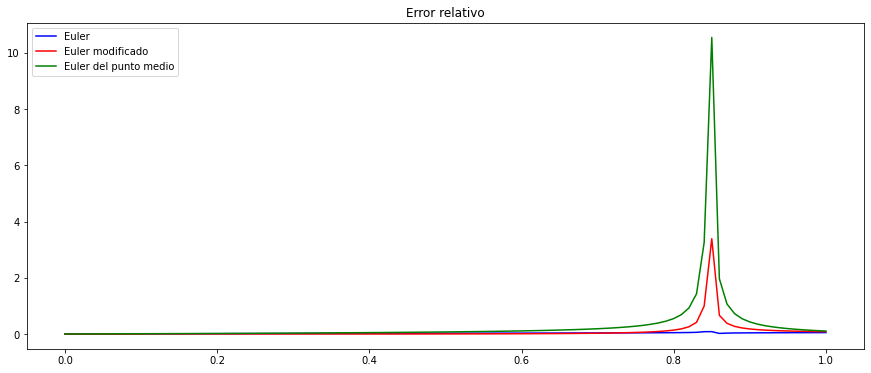

In [56]:
plt.figure(figsize=(15,6))

plt.plot(S3[:,0],ER3,'b',label='Euler')
plt.plot(S3[:,0],ERM3,'r',label='Euler modificado')
plt.plot(S3[:,0],ERPM3,'g',label='Euler del punto medio')
plt.title('Error relativo')
plt.legend(loc='best')

El error relativo es pequeño para los tres métodos, pero hay un aumento puntual del error alrededor de $h=0.85$ para los tres métodos, aunque para el método de Euler es un aumento muy pequeño, mientras que para el método de Euler del punto medio es un gran aumento (superior a $10$). Sin embargo, al avanzar en el intervalo y acercarnos a $x=1$, el error relativo vuelve a disminuir considerablemente.